In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# which outbreaks were the most severe?
# which outbreaks caused the most number of people to be ill?
# which outbreaks caused the most number of hospitalizations?
# which outbreaks caused a disproportionate number of hospitalizations per illness? fatalities?

In [3]:
df = pd.read_csv('outbreaks.csv')

In [4]:
df = df[df['Species'].notnull()]

In [5]:
food_set = df['Food'].str.lower().str.replace(',','').str.replace(';','').str.split()
food_set.head()

3                                  [fish, ahi]
4          [lasagna, unspecified, eggs, other]
5                                          NaN
7    [stuffing, unspecified, sandwich, turkey]
8                         [salad, unspecified]
Name: Food, dtype: object

In [6]:
species_set = df['Species'].str.lower().str.replace(';',',').str.split(',').map(lambda x:[i.strip() for i in x])
species_set.head()

3        [scombroid toxin]
4    [salmonella enterica]
5        [shigella boydii]
7    [salmonella enterica]
8                  [virus]
Name: Species, dtype: object

In [7]:
df['clean food'] = food_set

In [8]:
df['clean species'] = species_set

In [9]:
# one challenge with this data was that some, but not most, of the outbreaks had multiple species
# reported, but these reports were inconsistent. Some of the secondary species were subtypes of the
# first species listed, and some secondary species were separate organisms altogether, which could be a 
# sign of inaccurate data due to the fact that polymicrobial infections are relatively uncommon; more likely, one
# or more of the species reported in polymicrobial infections were misreported contaminants

In [10]:
# the following block of code shows that 672 outbreaks out 7245 had multiple species report, and the 
# majority of those were subtypes rather than secondary organisms

In [11]:
df[df['clean species'].apply(len)>1]['clean species']

137      [clostridium perfringens, staphylococcus aureus]
370                    [shigella boydii, shigella sonnei]
413             [escherichia coli, shiga toxin-producing]
469             [escherichia coli, shiga toxin-producing]
474                  [escherichia coli, enteropathogenic]
                               ...                       
19012           [escherichia coli, shiga toxin-producing]
19038            [bacillus cereus, staphylococcus aureus]
19080           [escherichia coli, shiga toxin-producing]
19095            [bacillus cereus, staphylococcus aureus]
19103             [shigella sonnei, campylobacter jejuni]
Name: clean species, Length: 1044, dtype: object

In [12]:
# adding a column to df that takes the first species from reported list

In [13]:
df['primary species'] = df['clean species'].apply(lambda x: x[0])

In [14]:
# using the primary species to one-hot encode the outbreaks, which turns out to be unncessary, and 
# further down in the notebook you will see groupby accomplish the same task with less code and computation

In [15]:
pd.get_dummies(df['primary species']).head(2)

,amnesic shellfish poison,anisakis,astrovirus,bacillus,bacillus cereus,bacillus other,bacillus unknown,bacterium,brucella unknown,campylobacter,...,trichinella unknown,unknown,vibrio cholerae,vibrio other,vibrio parahaemolyticus,vibrio unknown,vibrio vulnificus,virus,yersinia,yersinia enterocolitica
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df['Illnesses'].values.reshape(-1,1)

array([[ 4],
       [26],
       [25],
       ...,
       [16],
       [43],
       [ 5]])

In [17]:
illness_counts_dummies = pd.get_dummies(df['primary species']) * df['Illnesses'].values.reshape(-1,1)

In [18]:
df_illnesses = pd.merge(df, illness_counts_dummies, left_index=True, right_index=True)

In [19]:
# df.groupby('primary species').sum().iloc[:40,:]

In [20]:
# df.groupby('primary species').sum().iloc[40:,:]

In [21]:
illnesses = df.groupby('primary species').sum()['Illnesses']
top_illnesses = illnesses.sort_values(ascending=False)

In [22]:
# top_illnesses[:10]

In [23]:
hospitalizations = df.groupby('primary species').sum()['Hospitalizations']
top_hospitalizations = hospitalizations.sort_values(ascending=False)

In [24]:
# top_hospitalizations[:10]

In [25]:
fatalities = df.groupby('primary species').sum()['Fatalities']
top_fatalities = fatalities.sort_values(ascending=False)

In [26]:
# top_fatalities[:10]

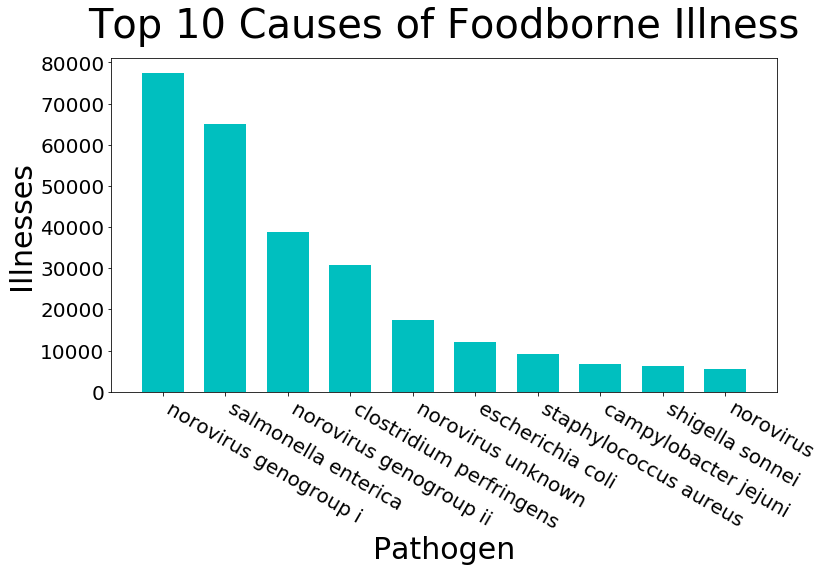

In [27]:
top = top_illnesses
n = 10
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
strings = ['Pathogen', 'Illnesses', 'Top 10 Causes of Foodborne Illness']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.9) 

plt.savefig('figures/etiologies');

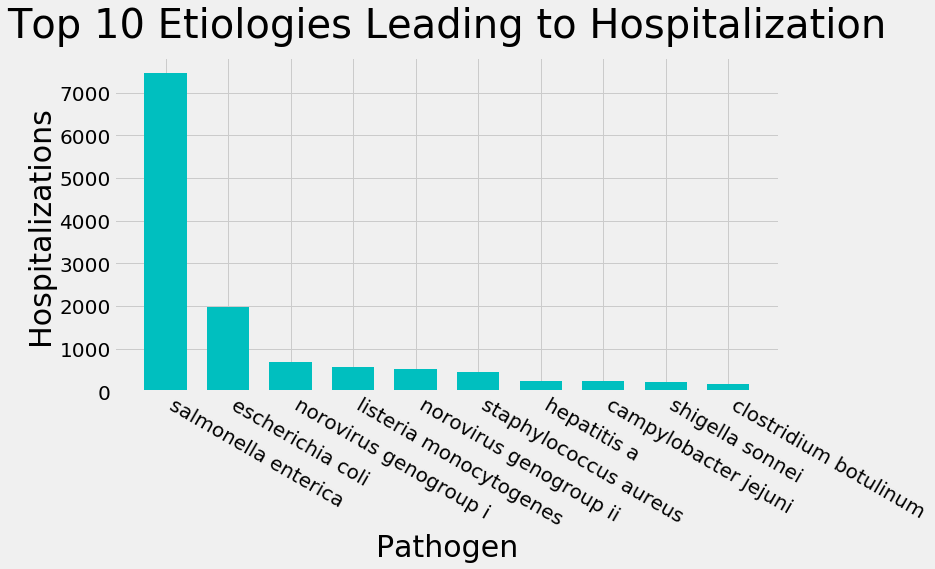

In [28]:
top = top_hospitalizations
n = 10
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
strings = ['Pathogen', 'Hospitalizations', 'Top 10 Etiologies Leading to Hospitalization']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.9) 

plt.savefig('figures/hospitalizations');

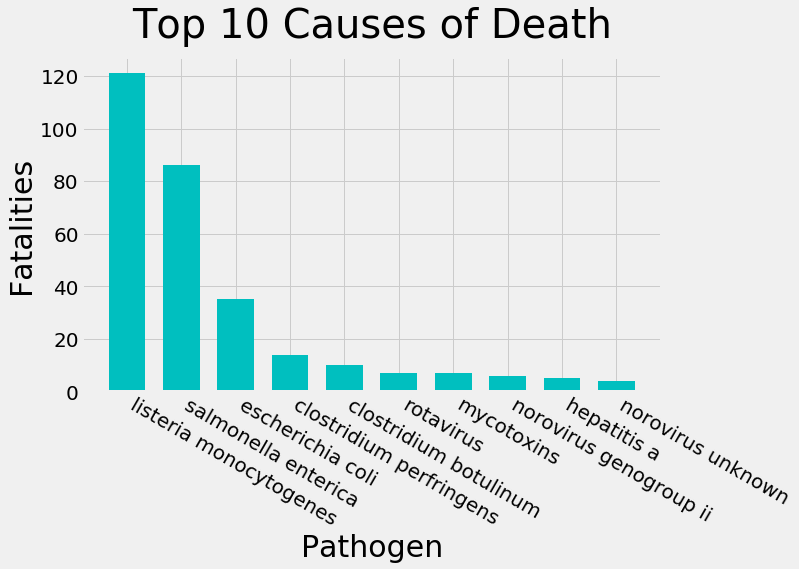

In [29]:
top = top_fatalities
n = 10
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
strings = ['Pathogen', 'Fatalities', 'Top 10 Causes of Death']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.8) 

plt.savefig('figures/fatalities');

In [30]:
# fig,axs = plt.subplots(3,1, figsize=(20,20))

# axs[0].bar(top_illnesses[:10].index,top_illnesses[:10])
# axs[0].set_title('Cases', fontsize=35)

# axs[1].bar(top_hospitalizations[:10].index,top_hospitalizations[:10])
# axs[1].set_title('Hospitalizations', fontsize=35)

# axs[2].bar(top_fatalities[:10].index,top_fatalities[:10])
# axs[2].set_title('Fatalities', fontsize=35)

# axs[0].set_xticklabels(labels=top_illnesses[:10].index, rotation=-45)
# axs[1].set_xticklabels(labels=top_hospitalizations[:10].index, rotation=-45)
# axs[2].set_xticklabels(labels=top_fatalities[:10].index, rotation=-45)

# plt.setp(ax.xaxis.get_majorticklabels(), ha='left')

# plt.rc('xtick', labelsize=18) 
# plt.suptitle('Top 10 Etiologies of Foodborne Illnesses', size=40, verticalalignment='bottom')
# plt.subplots_adjust(hspace=0.7)
# plt.style.use('fivethirtyeight')
# plt.savefig('figures/etiologies');

In [31]:
hospitalizations_per_illness = hospitalizations / illnesses
top_hospitalizations_per_illness = hospitalizations_per_illness.sort_values(ascending=False)

In [32]:
fatalities_per_illness = fatalities / illnesses
top_fatalities_per_illness = fatalities_per_illness.sort_values(ascending=False)

In [33]:
fatalities_per_hospitalization = fatalities / hospitalizations
top_fatalities_per_hospitalization = fatalities_per_hospitalization.sort_values(ascending=False)

In [34]:
# There were only 2 cases of amnesic shellfish poissoning, and both resulted in hospitalization, with zero
# fatalities

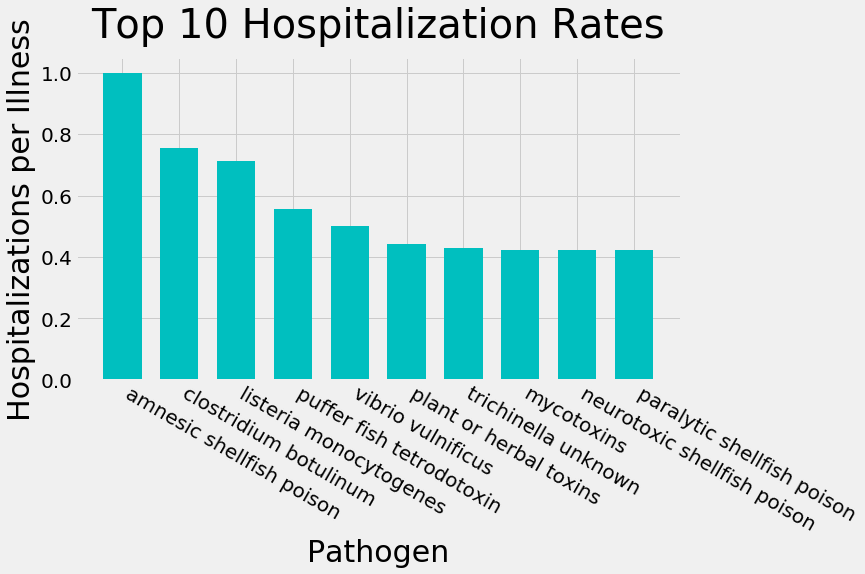

In [35]:
top = top_hospitalizations_per_illness
n = 10
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
strings = ['Pathogen', 'Hospitalizations per Illness', 'Top 10 Hospitalization Rates']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.32, left=0.1, right=.8) 

plt.savefig('figures/hospitalizations_per_illness');

In [36]:
n = 2
df1 = df.groupby('primary species').sum()
illnesses1 = df1[df1['Illnesses'] > n]['Illnesses']
hospitalizations1 = df1[df1['Illnesses'] > n]['Hospitalizations']
fatalities1 = df1[df1['Illnesses'] > n]['Fatalities']

fatalities_per_illness1 = fatalities1 / illnesses1
top_fatalities_per_illness1 = fatalities_per_illness1.sort_values(ascending=False)

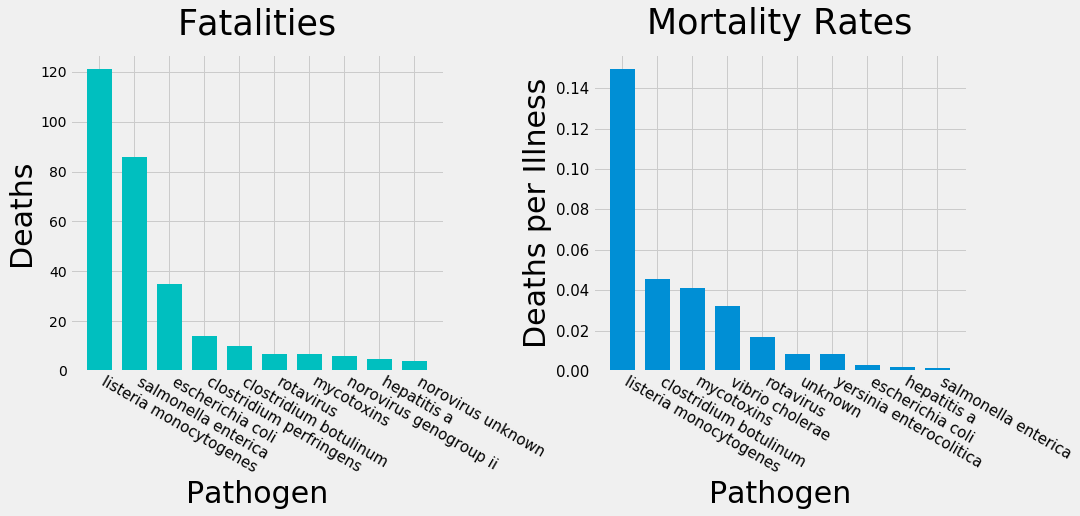

In [37]:
top = top_fatalities
n = 10
x = top[:n].index
y = top[:n]
strings = ['Pathogen', 'Deaths', 'Fatalities']


top1 = top_fatalities_per_illness1
x1 = top1[:n].index
y1 = top1[:n]
strings1 = ['Pathogen', 'Deaths per Illness', 'Mortality Rates']

fig_size = (15,8)
font1 = 15
font2 = 30
font3 = 35
colour = 'c'
colour1 = 'b'

fig,axs = plt.subplots(1,2, figsize=fig_size)

axs[0].bar(x, y, width=0.7, color=colour)
axs[0].set_xlabel(strings[0], fontsize=font2)
axs[0].set_ylabel(strings[1], fontsize=font2)
axs[0].set_title(strings[2], fontsize=font3, pad=20)
axs[0].set_xticklabels(x, rotation = -30, fontsize = font1, ha='left')

axs[1].bar(x1, y1, width=.7)
axs[1].set_xlabel(strings1[0], fontsize=font2)
axs[1].set_ylabel(strings1[1], fontsize=font2)
axs[1].set_title(strings1[2], fontsize=font3, pad=20)
axs[1].set_xticklabels(x1, rotation = -30, fontsize = font1, ha='left')

plt.yticks(fontsize=font1)
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4, top=.85, bottom=0.3, left=0.07, right=0.9) 

plt.savefig('figures/mortality_and_rate');

In [38]:
# Two cases of vibro vulnificus, one patient was hospitalized and died, the other patient was not hospitalized
# 762 cases of listeria, 541 hospitalizations, 116 deaths

In [39]:
# Extra filter for etiologies with >n illnesses

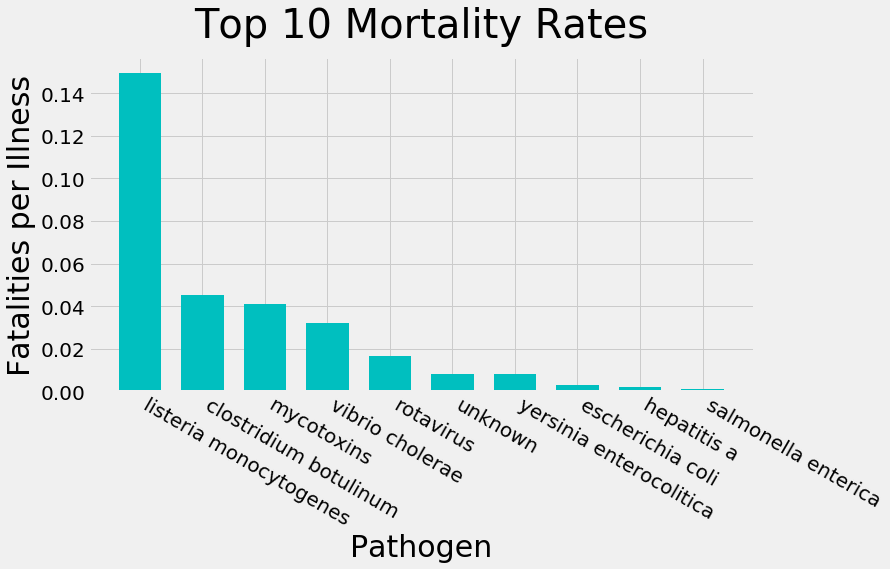

In [40]:
top = top_fatalities_per_illness1
n = 10
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
strings = ['Pathogen', 'Fatalities per Illness', 'Top 10 Mortality Rates']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.9) 

plt.savefig('figures/mortality_per_illness');

In [41]:
fatalities_per_hospitalization1 = fatalities1 / hospitalizations1
top_fatalities_per_hospitalization1 = fatalities_per_hospitalization1.sort_values(ascending=False)

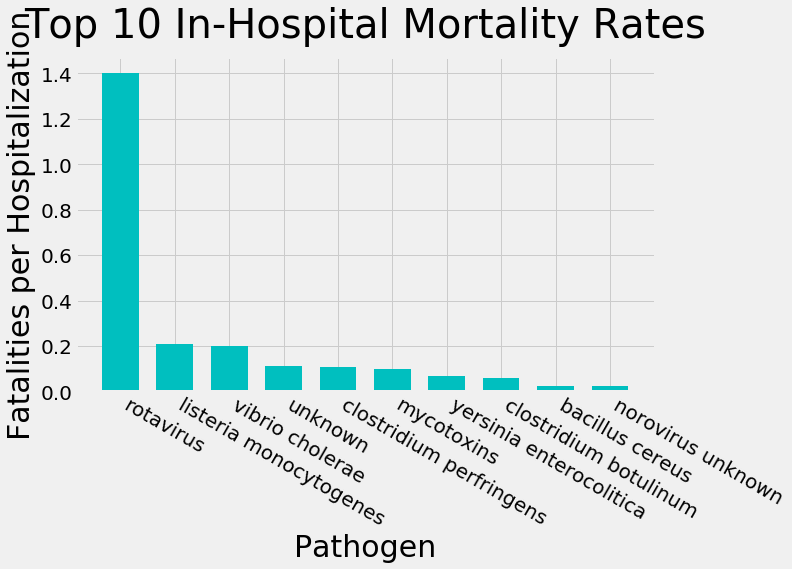

In [42]:
top = top_fatalities_per_hospitalization1
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
n = 10
strings = ['Pathogen', 'Fatalities per Hospitalization', 'Top 10 In-Hospital Mortality Rates']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.3, left=0.13, right=0.8) 

plt.savefig('figures/mortality_per_hospitalization');

In [43]:
top_hospitalizations

primary species
salmonella enterica       7455.0
escherichia coli          1980.0
norovirus genogroup i      685.0
listeria monocytogenes     577.0
norovirus genogroup ii     524.0
                           ...  
listeria unknown             0.0
staphylococcus other         0.0
clostridium other            0.0
staphylococcus unknown       0.0
trichinella                  0.0
Name: Hospitalizations, Length: 82, dtype: float64

In [45]:
# Fatalities per illness and fatalities per hospitalization among top 10 etiologies leading to hospitalization

In [46]:
fatalities_illness_hospital = fatalities_per_illness[top_hospitalizations.index[:10]]
fatalities_hospital_hospital = fatalities_per_hospitalization[top_hospitalizations.index[:10]]

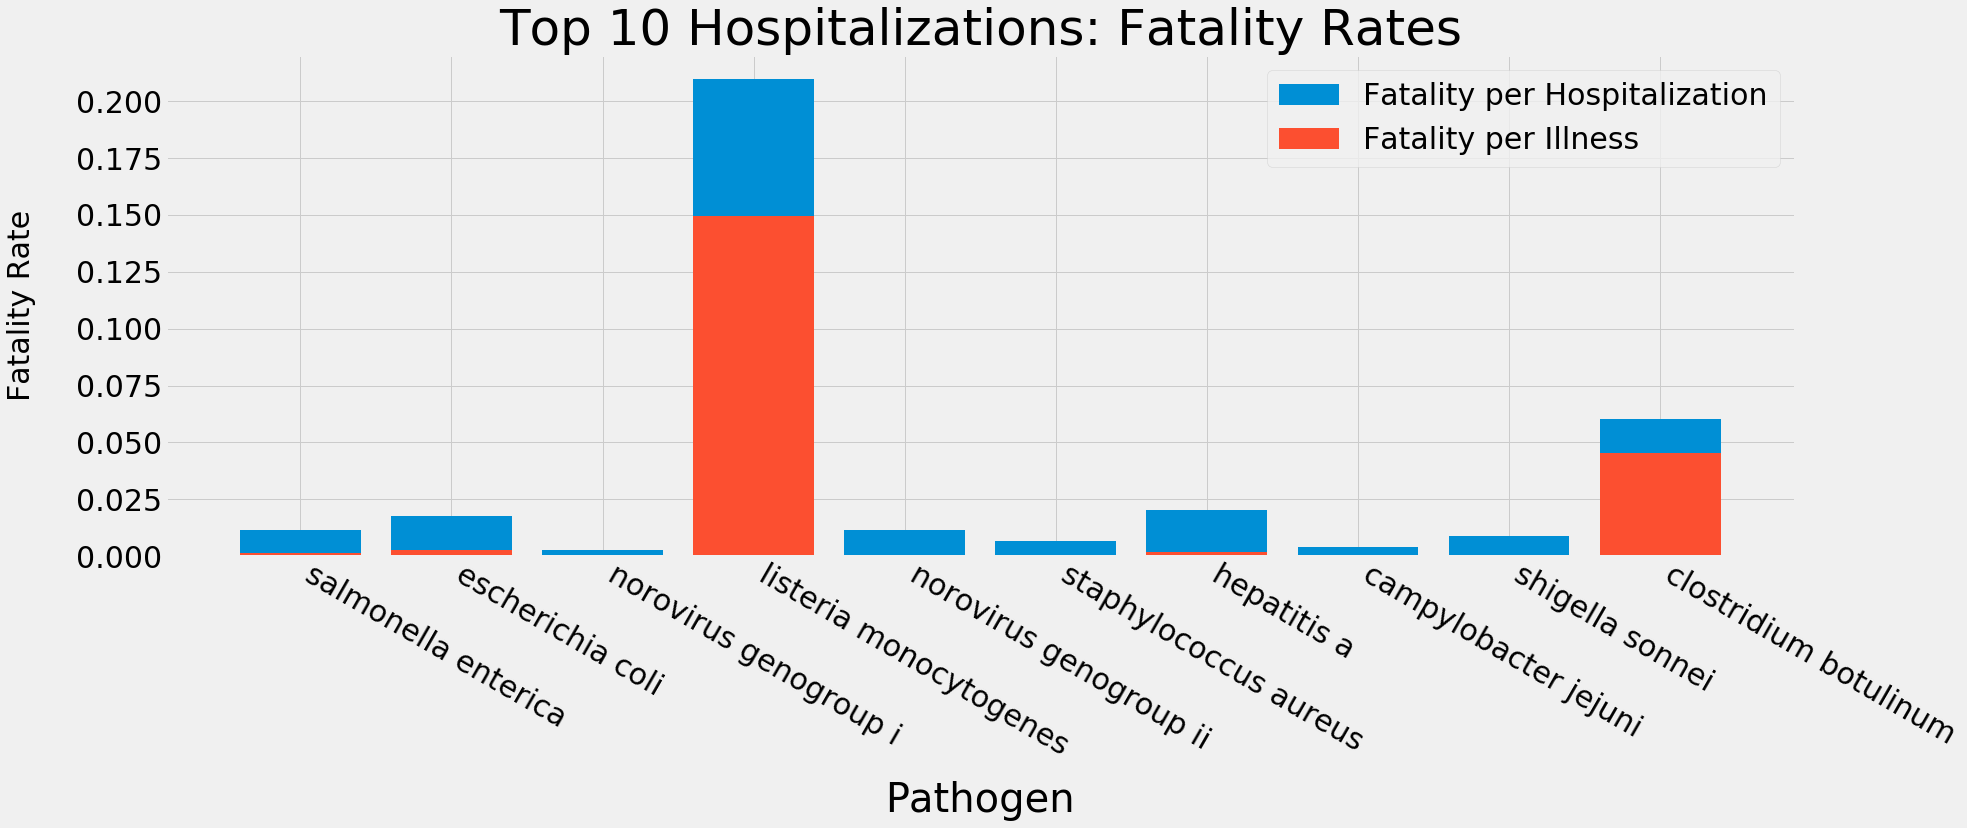

In [47]:
top = fatalities_illness_hospital

fig,ax = plt.subplots(figsize=(26, 12))
ax.bar(fatalities_hospital_hospital[:10].index,fatalities_hospital_hospital[:10], label='Fatality per Hospitalization')
ax.bar(fatalities_illness_hospital[:10].index,fatalities_illness_hospital[:10], label='Fatality per Illness')
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=40)
ax.set_ylabel('Fatality Rate', fontsize=30, labelpad = 40)
ax.set_title('Top 10 Hospitalizations: Fatality Rates', fontsize=50)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=30, rotation=-30, ha='left')
plt.yticks(fontsize=30)
plt.gcf().subplots_adjust(bottom=0.30)
plt.legend(fontsize=30)
plt.savefig('figures/fatality_rates_among_hospitalized')
plt.tight_layout;

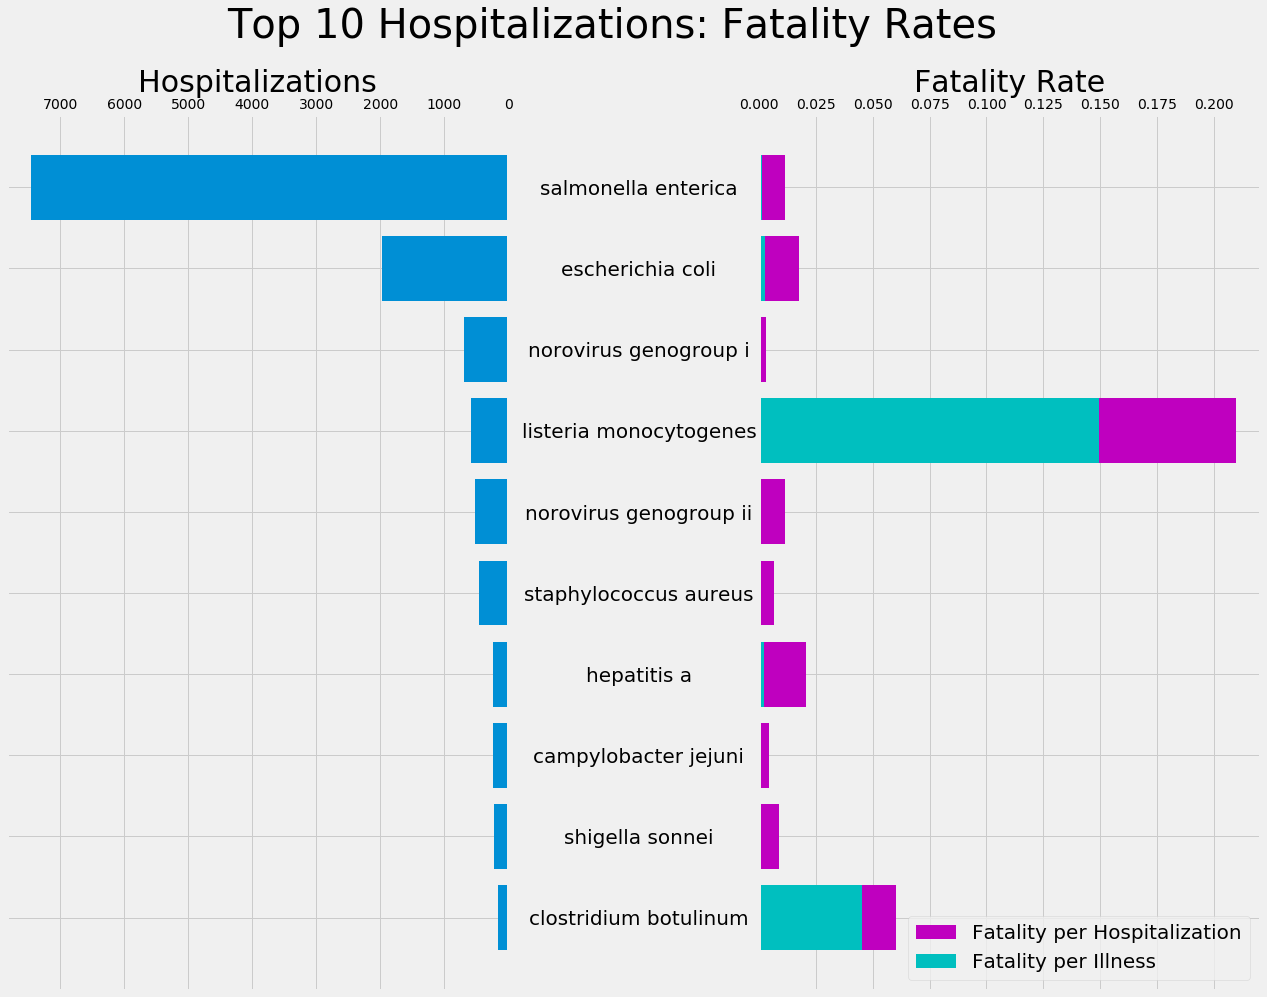

In [48]:
fig, axs = plt.subplots(1,2, figsize=(20,15))
axs[0].barh(top_hospitalizations[:10][::-1].index,top_hospitalizations[:10][::-1])
axs[0].set_title('Hospitalizations', fontsize=30)

axs[0].invert_xaxis()
axs[0].yaxis.set_label_position("right")
axs[0].set_yticklabels([])
axs[0].tick_params(axis='x', labeltop=True, labelbottom=False)

axs[1].barh(fatalities_hospital_hospital[:10][::-1].index,fatalities_hospital_hospital[:10][::-1], label='Fatality per Hospitalization', color='m')
axs[1].barh(fatalities_illness_hospital[:10][::-1].index,fatalities_illness_hospital[:10][::-1], label='Fatality per Illness', color='c')
axs[1].set_title('Fatality Rate', fontsize=30)
axs[1].tick_params(axis='y', which='major', pad=120)
axs[1].tick_params(axis='x', labeltop=True, labelbottom=False)

plt.suptitle('Top 10 Hospitalizations: Fatality Rates', fontsize=40)
plt.style.use('fivethirtyeight')
plt.yticks(fontsize=20, horizontalalignment='center')
plt.subplots_adjust(wspace=0.5)
plt.legend(fontsize=20, loc=4, bbox_to_anchor=(0,0,1,1))
plt.tight_layout

plt.savefig('figures/top_hospitalizations_fatality_rates');

In [49]:
hospitalizations_per_illness = hospitalizations / illnesses
hospitalizations_illness_hospital = hospitalizations_per_illness[top_hospitalizations.index[:10]]

In [50]:
top_hospitalizations

primary species
salmonella enterica       7455.0
escherichia coli          1980.0
norovirus genogroup i      685.0
listeria monocytogenes     577.0
norovirus genogroup ii     524.0
                           ...  
listeria unknown             0.0
staphylococcus other         0.0
clostridium other            0.0
staphylococcus unknown       0.0
trichinella                  0.0
Name: Hospitalizations, Length: 82, dtype: float64

In [51]:
hospitalizations_illness_hospital

primary species
salmonella enterica       0.114602
escherichia coli          0.164261
norovirus genogroup i     0.008859
listeria monocytogenes    0.712346
norovirus genogroup ii    0.013468
staphylococcus aureus     0.049917
hepatitis a               0.101582
campylobacter jejuni      0.035119
shigella sonnei           0.035880
clostridium botulinum     0.754545
dtype: float64

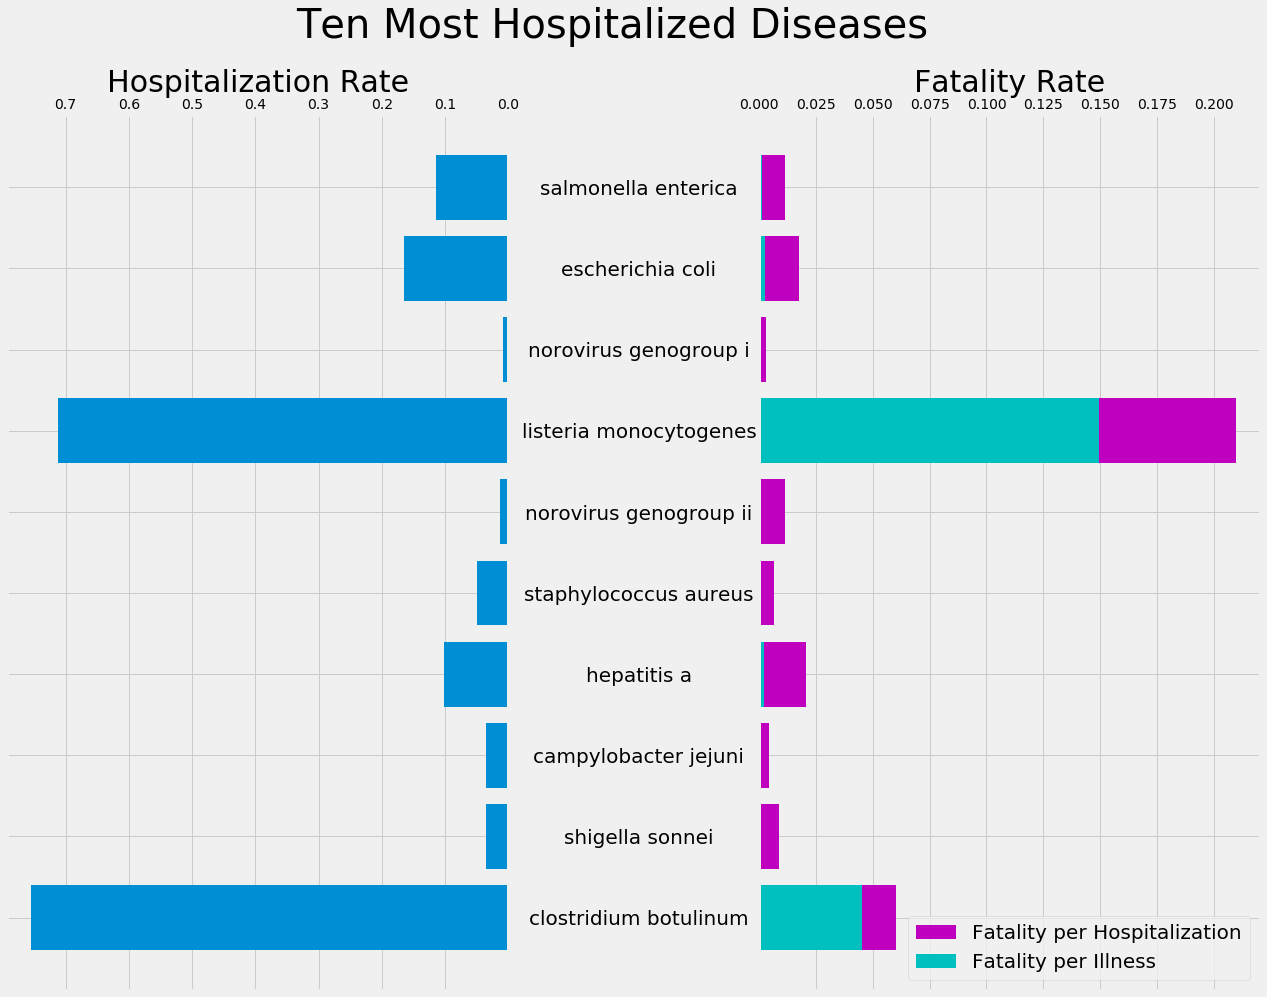

In [52]:
fig, axs = plt.subplots(1,2, figsize=(20,15))
axs[0].barh(hospitalizations_illness_hospital[:10][::-1].index,hospitalizations_illness_hospital[:10][::-1])
axs[0].set_title('Hospitalization Rate', Fontsize=30)

axs[0].invert_xaxis()
axs[0].yaxis.set_label_position("right")
axs[0].set_yticklabels([])
axs[0].tick_params(axis='x', labeltop=True, labelbottom=False)

axs[1].barh(fatalities_hospital_hospital[:10][::-1].index,fatalities_hospital_hospital[:10][::-1], label='Fatality per Hospitalization', color='m')
axs[1].barh(fatalities_illness_hospital[:10][::-1].index,fatalities_illness_hospital[:10][::-1], label='Fatality per Illness', color='c')
axs[1].set_title('Fatality Rate', fontsize=30)
axs[1].tick_params(axis='y', which='major', pad=120)
axs[1].tick_params(axis='x', labeltop=True, labelbottom=False)

plt.suptitle('Ten Most Hospitalized Diseases', fontsize=40)
plt.style.use('fivethirtyeight')
plt.yticks(fontsize=20, horizontalalignment='center')
plt.subplots_adjust(wspace=0.5)
plt.legend(fontsize=20, loc=4, bbox_to_anchor=(0,0,1,1))
plt.tight_layout

plt.savefig('figures/top_hospitalizations_fatality_rates');